## Final Project Submission

Please fill out:
* Student name: Muthuri Abigail Mwendwa
* Student pace: full time
* Scheduled project review date/time: March 22nd
* Instructor name: Maryann Mwikali
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

#### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

#### Read the datasets 

In [3]:
bom_df = pd.read_csv('unzippedData/bom.movie_gross.csv')

In [4]:
tmdb_df = pd.read_csv('unzippedData/tmdb.movies.csv', index_col = 0)

In [5]:
conn = sqlite3.connect('unzippedData/im.db') 

#### Analyse and Clean the bom.movies_gross.csv

In [6]:
bom_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [7]:
bom_df.shape

(3387, 5)

In [8]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [9]:
bom_df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [10]:
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
bom_df.dropna(inplace=True)

In [13]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [14]:
bom_df['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'WOW', 'FM', 'FD',
       'Vari.', 'TriS', 'ORF', 'IM', 'Elev.', 'Cohen', 'NeoC', 'Jan.',
       'MNE', 'Trib.', 'Vita.', 'Rocket', 'OMNI/FSR', 'KKM', 'Argo.',
       'Libre', 'FRun', 'P4', 'KC', 'MPFT', 'Icar.', 'AGF', 'NYer',
       'LG/S', 'WHE', 'WGUSA', 'MPI', 'RTWC', 'FIP', 'RF', 'KL', 'ArcEnt',
       'PalUni', 'EpicPics', 'EOne', 'AF', 'LD', 'TFA', 'WAMCR', 'PM&

In [15]:
bom_df.duplicated().sum()

0

The dataset initially consisted of 3387 entries and 5 columns: 'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year'.

The 'domestic_gross' column is of float64 data type, representing the earnings from the domestic market.

The 'foreign_gross' column was initially of object data type, indicating it likely contains non-numeric values. This could be a result of mixed data types or formatting issues.

There were missing values (NaN) present in the dataset, particularly in the 'studio', 'domestic_gross', and 'foreign_gross' columns.

After dropping rows with missing values using dropna(), the dataset was reduced to 2007 entries.


#### Analyse and Clean the tmdb.movies.csv

In [16]:
tmdb_df.head(50)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [17]:
tmdb_df.shape

(26517, 9)

In [18]:
tmdb_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [19]:
tmdb_df.isna()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False


In [20]:
tmdb_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [21]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


The dataset contains information about movies from TMDB (The Movie Database), including details such as title, genre, release date, popularity, and ratings.

The dataset consists of 26,517 entries and 10 columns: 'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', and 'vote_count'.

Descriptive statistics of the dataset show that the average vote count is approximately 194, with a maximum vote count of 22,186.

There are no missing values present in the dataset, as indicated by the absence of null values in the 'isna().sum()' operation.

#### Analyse and Clean the im.db

In [22]:
col_df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
col_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [23]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [24]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [25]:
im_df = pd.merge(movie_ratings, movie_basics, on='movie_id')
im_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [26]:
im_df.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


In [27]:
im_df.isna()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
73851,False,False,False,False,False,False,False,False
73852,False,False,False,False,False,False,False,False
73853,False,False,False,False,False,False,True,False
73854,False,False,False,False,False,False,False,False


In [28]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [29]:
im_df.dropna(inplace=True)

In [30]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   averagerating    65720 non-null  float64
 2   numvotes         65720 non-null  int64  
 3   primary_title    65720 non-null  object 
 4   original_title   65720 non-null  object 
 5   start_year       65720 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           65720 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The dataset consists of information about movies, including their ratings, number of votes, titles, release years, runtime, and genres. 

Using movie_id as unique identifier, I merged two columns movie_basics and movie_ratings to form my im_df

After cleaning, the dataset contains 65,720 entries with no missing values. The average rating of the movies in the dataset is approximately 6.33, with a standard deviation of 1.47. The average number of votes is approximately 3,523, with a standard deviation of approximately 30,294. The movies range in release years from 2010 to 2019, with an average runtime of approximately 94.65 minutes.


#### Data Visualisations

##### Dataset : tmdb_df


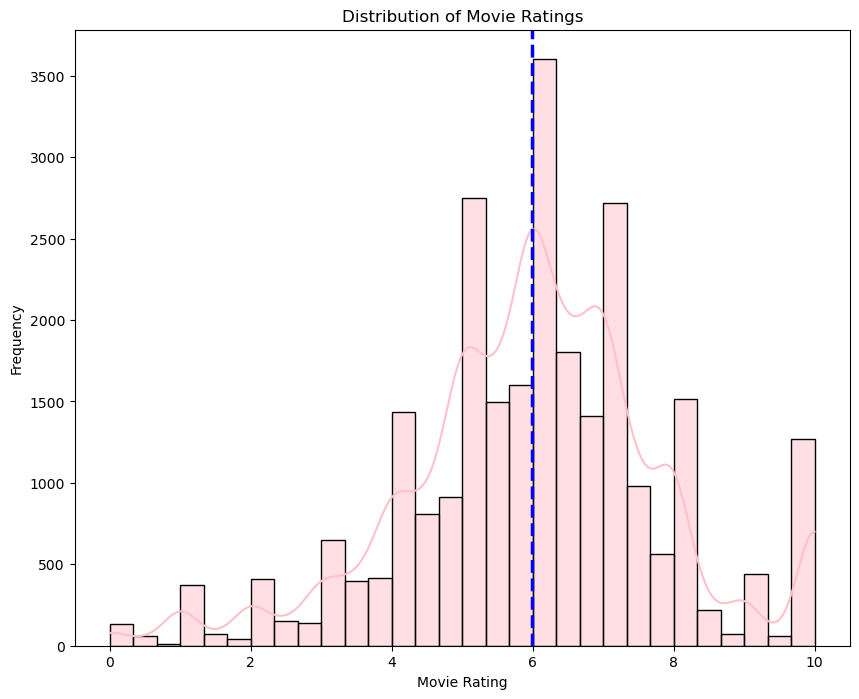

In [31]:
# Plotting a histogram 
plt.figure(figsize=(10, 8))
sns.histplot(data = tmdb_df, x='vote_average', bins=30, kde=True, color = 'pink' )
plt.axvline(tmdb_df['vote_average'].mean(), color='blue', linestyle='dashed', linewidth=2.5)  
plt.title('Distribution of Movie Ratings')
plt.xlabel('Movie Rating')
plt.ylabel('Frequency')
plt.show()

- The histogram shows the distribution of movie ratings providing insights into the overall quality of movies in the dataset, which directly relates to the business problem of Microsoft's new movie studio entering the film industry.

- By analyzing the distribution of movie ratings, Microsoft can gain insights into what constitutes a "good" or "great" movie in the eyes of viewers.

- If the rating falls on the left side of the mean line it shows that the movie has performed below average and vice versa.

- The histogram allows Microsoft to check the quality of their movies against existing films in the dataset. 

- Understanding the distribution of movie ratings can also help identify target audiences. By analyzing which types of movies tend to receive higher ratings, Microsoft can tailor their content to appeal to specific demographics or preferences, ultimately increasing the chances of commercial success.

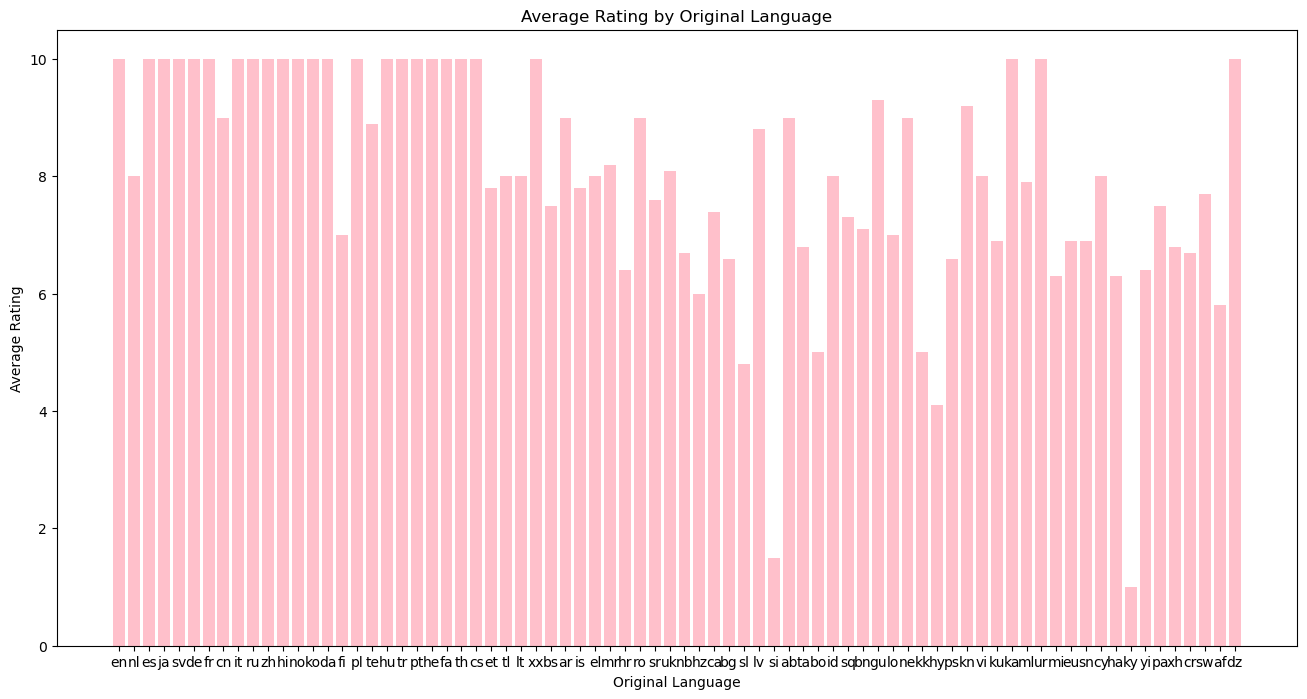

In [32]:
# Plotting bar graph
plt.figure(figsize=(16, 8))
plt.bar(x=tmdb_df['original_language'], height=tmdb_df['vote_average'],color='pink')
plt.title('Average Rating by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Average Rating')
plt.show()


The bar plot displays the average rating of movies based on their original language thus offering insights into language preferences and the quality of movies in different languages.

- Understanding the average rating of movies based on their original language helps Microsoft identify language preferences among audiences. 

- By analyzing which languages receive higher ratings on average, Microsoft can tailor their content strategy to prioritize languages that resonate most with viewers. 

-  Languages associated with higher average ratings may indicate a higher standard of filmmaking or storytelling within those language-speaking communities. 

- By identifying languages with high average ratings, Microsoft can prioritize subtitling their movies into those languages to enhance accessibility and appeal to international or foreign viewers. 


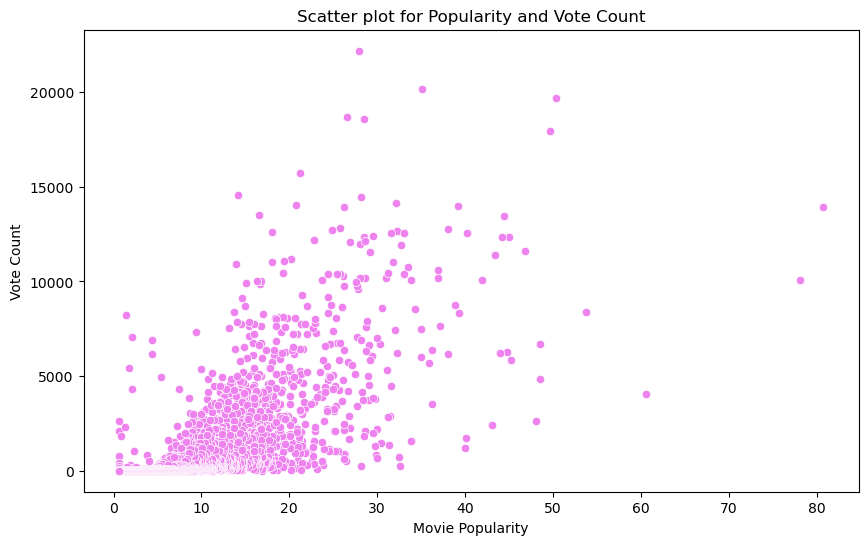

In [33]:
# Plotting scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tmdb_df, x='popularity', y='vote_count', color = 'violet')
plt.title('Scatter plot for Popularity and Vote Count')
plt.xlabel('Movie Popularity')
plt.ylabel('Vote Count')
plt.show()

The scatter plot illustrates the relationship between a movie's popularity and the number of votes it has received. This offers perspectives on the degree of involvement and enthusiasm from viewers..

- The scatter plot allows Microsoft to gauge the level of interest and interaction among audiences, which is crucial for creating content that best resonates with viewers and drives engagement.

- The scatter plot indicates that movies with high popularity and a large number of votes may be considered successful, while those with low engagement metrics may require adjustments in marketing strategies or content creation.

- Comparing the engagement levels of Microsoft's movies with those of competitors, Microsoft can identify strengths, weaknesses, and opportunities in the market, helping them make informed decisions to stay competitive.

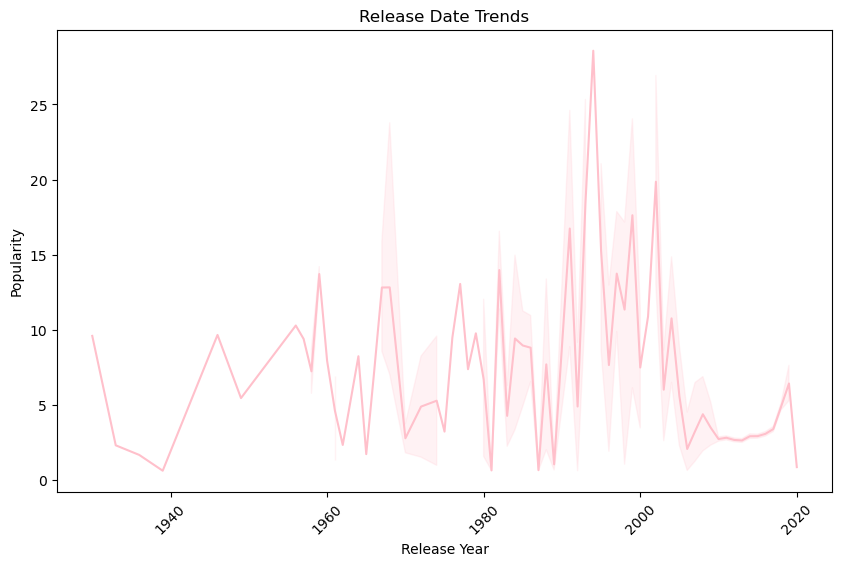

In [34]:
# release date is converted to datetime format
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
# Extracting year from release_date
tmdb_df['release_year'] = tmdb_df['release_date'].dt.year

# Plotting line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=tmdb_df, x='release_year', y='popularity',color='pink')
plt.title('Release Date Trends')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

The line plot illustrates trends in movie popularity over the years and provides insights into the evolution of audience preferences and the impact of release timing on movie success.

- Microsoft can gain valuable insights into shifting audience preferences by understanding which types of movies have gained popularity or declined in recent years.

- By observing trends in movie popularity, Microsoft can identify emerging genres, themes, or storytelling approaches that are gaining popularity among audiences. 

- By understanding how movie popularity has evolved over the years, Microsoft can anticipate future shifts in audience tastes and adapt their strategies accordingly to remain relevant in the long run.


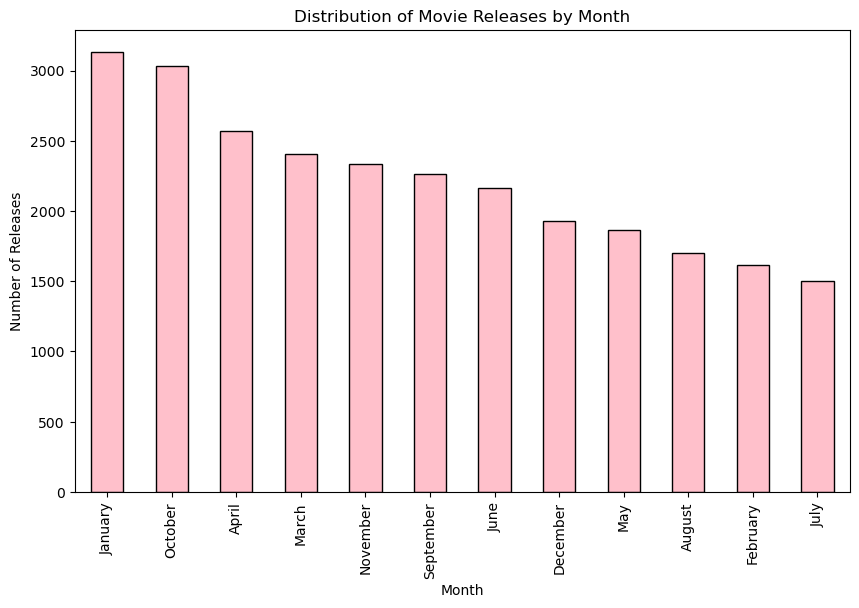

In [35]:
# Convert 'release_date' column to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Extract month and count movie releases per month
monthly_release_count = tmdb_df['release_date'].dt.month_name().value_counts()

# Plot the graph
plt.figure(figsize=(10, 6))
monthly_release_count.plot(kind='bar', edgecolor='black', color='pink')
plt.title('Distribution of Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.show()


- Understanding the distribution of movie releases across different months allows Microsoft to devise a strategic release timing strategy. By analyzing which months have the highest and lowest number of movie releases, Microsoft can identify the best months to launch their own movies.

- The graph helps Microsoft identify any seasonal trends in movie releases. For example, if there's a noticeable spike in movie releases during certain months (e.g., holiday seasons), Microsoft can capitalize on these trends by aligning their content strategy and release schedule accordingly. 

- Microsoft can assess when other studios are releasing their movies and adjust their own release schedule to avoid direct competition or strategically position their movies against competing releases.

- Certain months may attract more moviegoers due to factors such as school holidays, cultural events, or weather conditions. By identifying months with higher movie release volumes, Microsoft can know when to release movies.



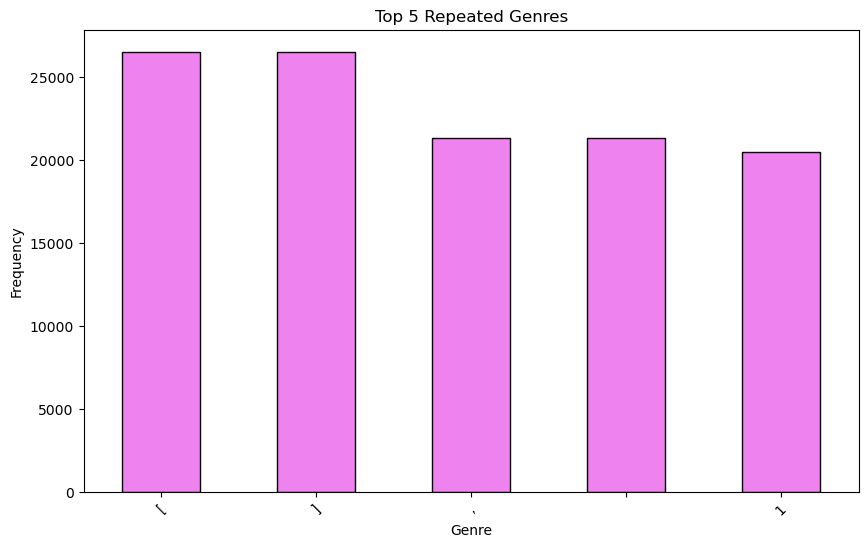

In [36]:
# each movie has a list of genre  so make all lists into one
genres_list = [genre for sublist in tmdb_df['genre_ids'] for genre in sublist]
# frequency of each genre
genre_counts = pd.Series(genres_list).value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
genre_counts.head(5).plot(kind='bar', color='violet', edgecolor = 'black')
plt.title('Top 5 Repeated Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


- The bar plot above illustrates the top 5 repeated genres in the movie dataset. This visualization provides valuable insights into the most prevalent genres in the film industry, which is crucial for Microsoft's new movie studio venture. 
- By understanding which genres are most frequently produced and potentially more successful at the box office, Microsoft can strategically decide which types of films to create. 

##### Dataset : bom_df

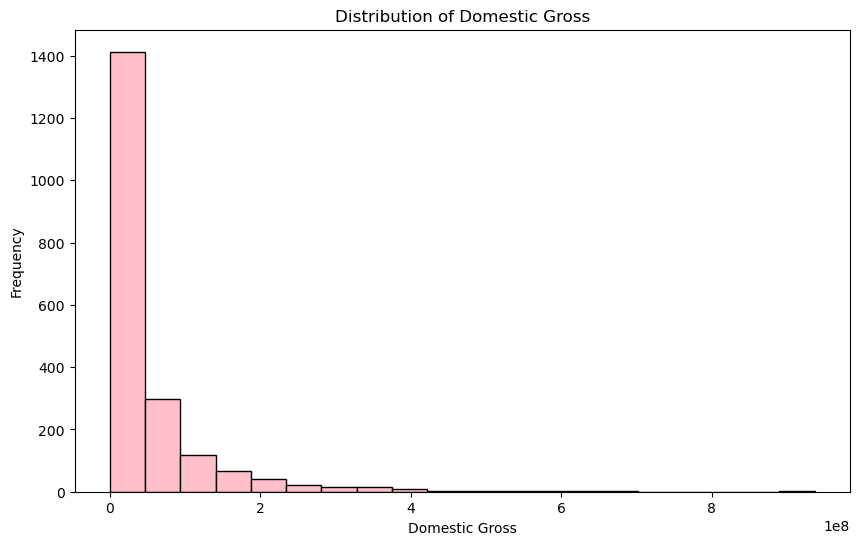

In [37]:
# Histogram of Domestic Gross
plt.figure(figsize=(10, 6))
plt.hist(bom_df['domestic_gross'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.show()

- This histogram illustrates the distribution of domestic gross revenue across all movies in the dataset.

- Understanding the typical range of earnings for movies is crucial for Microsoft to gauge the potential financial performance of their future productions and set realistic revenue expectations.

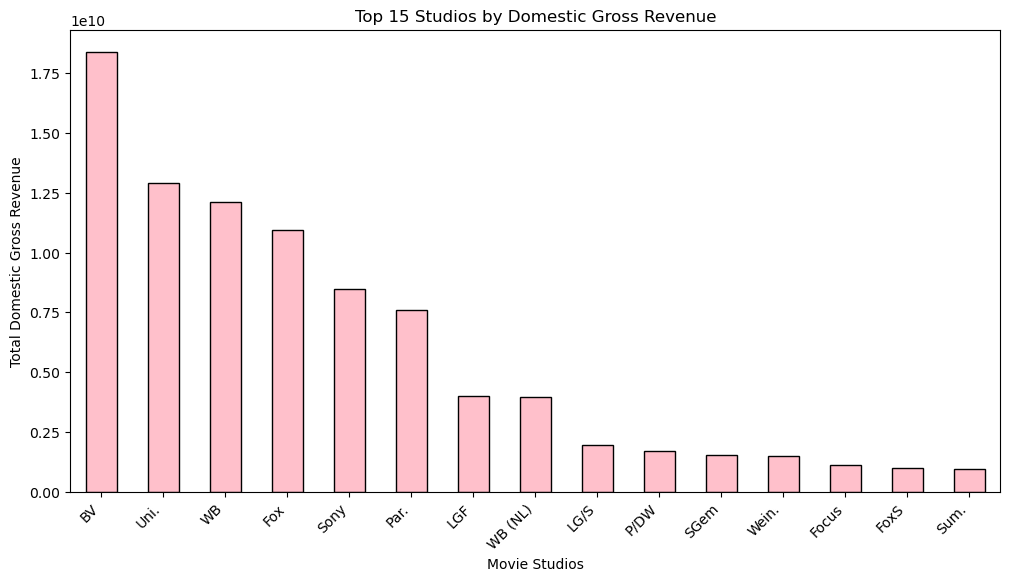

In [38]:
# Bar plot
studio_revenue = bom_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
studio_revenue.plot(kind='bar', color='pink', edgecolor = 'black')
plt.title('Top 15 Studios by Domestic Gross Revenue')
plt.xlabel('Movie Studios')
plt.ylabel('Total Domestic Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

- This bar plot showcases the total domestic gross revenue generated by the top 15 movie studios.
- Identifying the studios with the highest revenue can inform strategic partnerships, investment decisions, and distribution agreements. 
- Understanding which studios dominate the market can inform strategic partnerships or collaborations, guiding Microsoft's entry strategy into the competitive landscape.

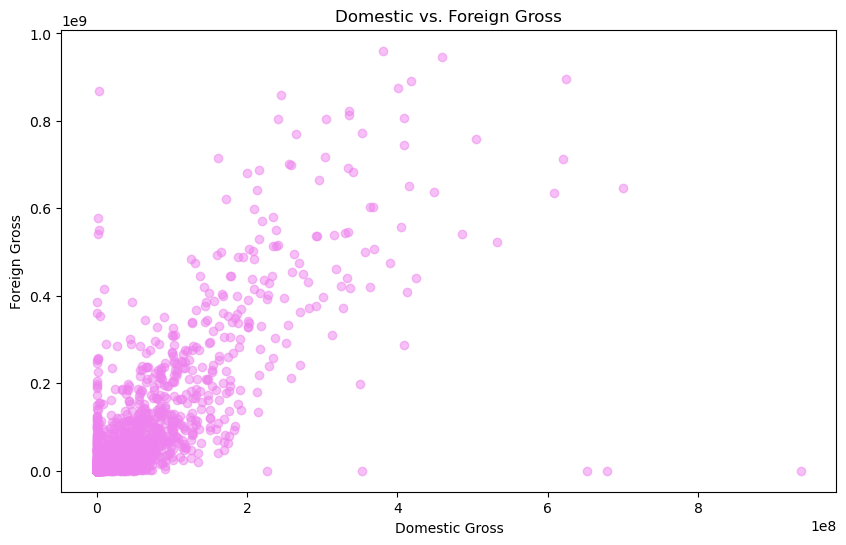

In [39]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '').astype(float)  # Convert foreign gross to numeric
plt.figure(figsize=(10, 6))
plt.scatter(bom_df['domestic_gross'], bom_df['foreign_gross'], color='violet', alpha=0.5)
plt.title('Domestic vs. Foreign Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.show()

- This scatter plot visualizes the relationship between domestic and foreign gross revenue for individual movies.
- Analyzing this relationship enables Microsoft to assess the global performance of movies and understand the effectiveness of international distribution strategies. This insight is crucial for Microsoft to plan their distribution and marketing efforts for their movies on a global scale.

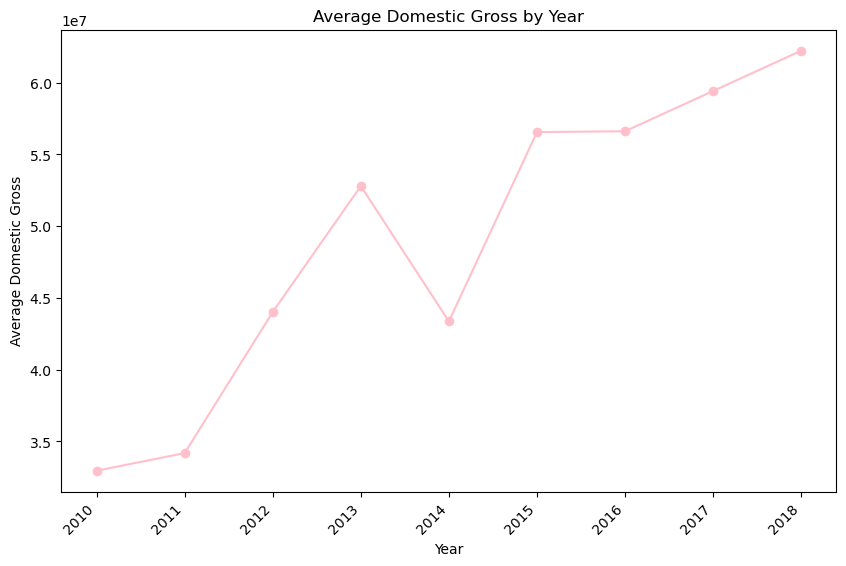

In [40]:
# 5. Line Plot of Average Domestic Gross by Year
avg_domestic_gross_yearly = bom_df.groupby('year')['domestic_gross'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_domestic_gross_yearly.index, avg_domestic_gross_yearly.values, marker='o', color='pink', linestyle='-')
plt.title('Average Domestic Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.xticks(rotation=45, ha='right')
plt.show()

- This line plot illustrates the trend of average domestic gross revenue over the years.
- By tracking revenue trends over time, Microsoft can identify periods of growth, anticipate future revenue expectations, and strategically plan their entry into the market to capitalize on favorable market conditions.

##### Dataset : im_df

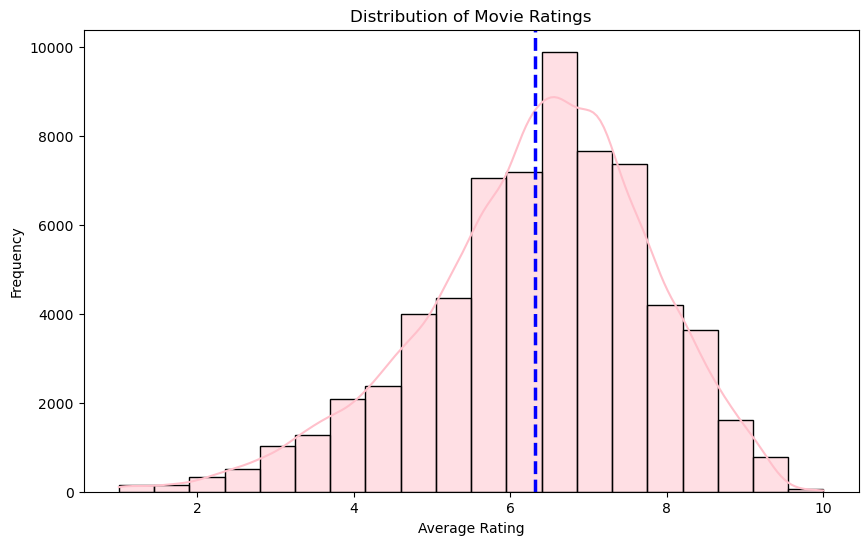

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(im_df['averagerating'], bins=20, color='pink', kde=True)
plt.axvline(im_df['averagerating'].mean(), color='blue', linestyle='dashed', linewidth=2.5)  
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


- The histogram shows the distribution of movie ratings, indicating that the ratings are roughly normally distributed around the mean rating (represented by the dashed blue line). 
- This insight helps Microsoft understand the typical range and frequency of ratings for movies in the dataset, which can inform their decisions on what types of movies to produce.

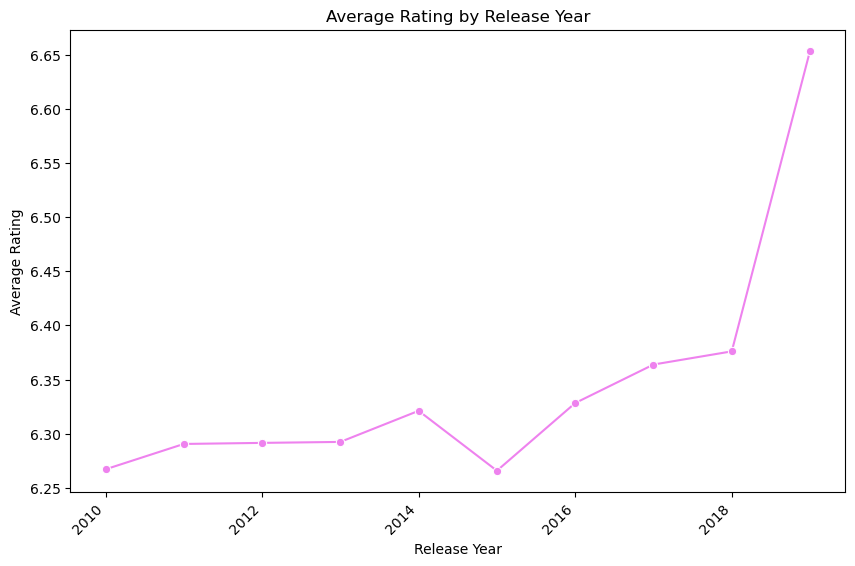

In [42]:
avg_rating_yearly = im_df.groupby('start_year')['averagerating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rating_yearly, x='start_year', y='averagerating', color='violet', marker='o')
plt.title('Average Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

- This line plot illustrates the trend of average ratings over the years. It provides insights into how the average rating of movies has evolved over time. 
- Microsoft can use this information to gauge audience preferences and identify any trends in movie quality over the years, helping them make informed decisions about the types of movies to produce.

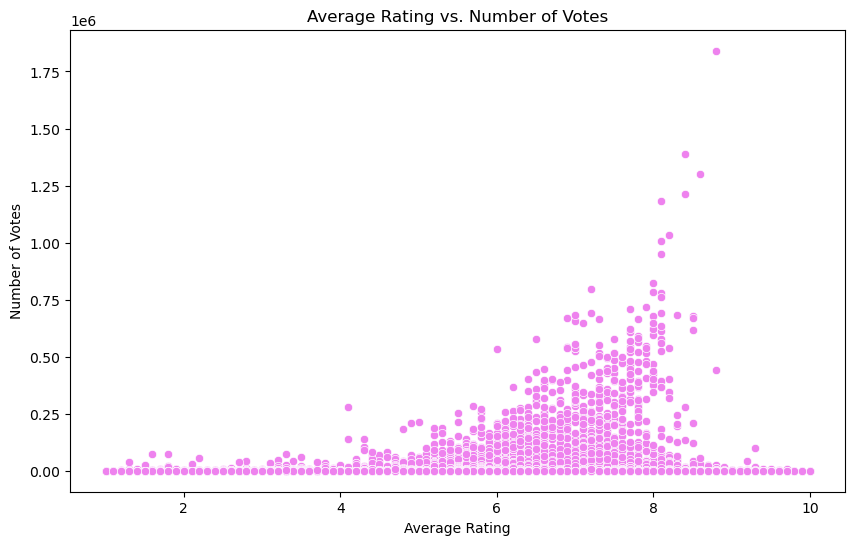

In [43]:
# Scatter plot of averagerating vs. numvotes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=im_df, x='averagerating', y='numvotes', color='violet')
plt.title('Average Rating vs. Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

- The scatter plot visualizes the relationship between the average rating and the number of votes received by movies. It helps identify whether there is any correlation between these two variables. 
- Microsoft can use this insight to understand the level of engagement and popularity of movies based on their ratings and number of votes, which can guide their decision-making process in choosing which types of movies to invest in.

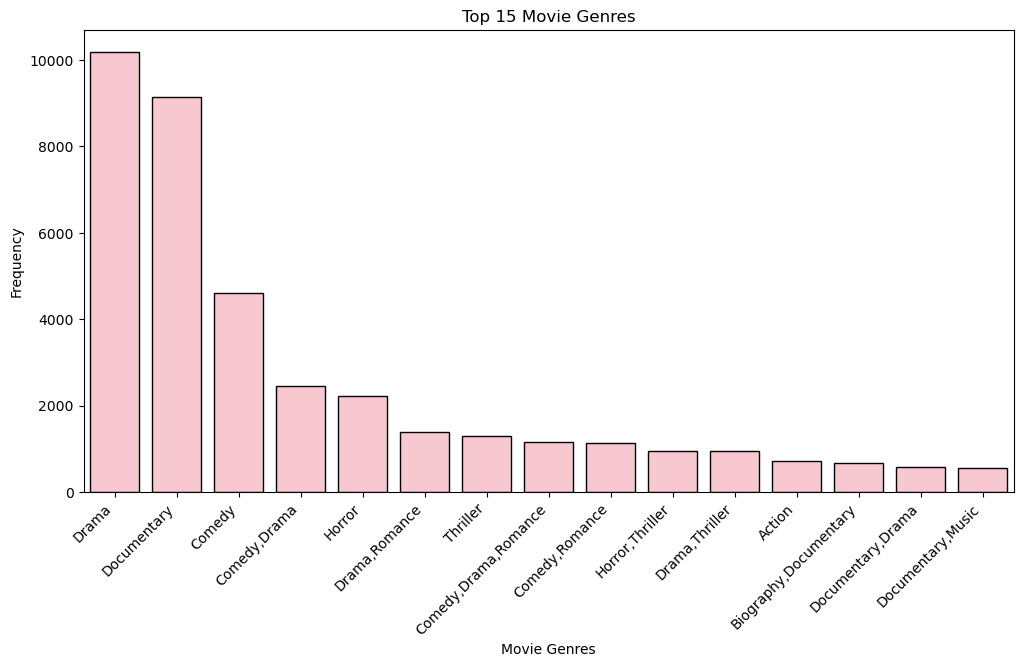

In [44]:
# bar plot of count of movies by genre
plt.figure(figsize=(12, 6))
sns.countplot(data=im_df, x='genres', order=im_df['genres'].value_counts().index[:15], color = 'pink', edgecolor ='black')
plt.title('Top 15 Movie Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


- The bar plot displays the frequency of movie genres, showing the top 15 most common genres in the dataset. This information helps Microsoft identify the most popular genres among viewers.
- By understanding which genres are currently resonating with audiences, Microsoft can make informed decisions about the types of genres to produce to maximize audience engagement and box office success.

#### Statistical Analysis

##### Dataset : tmdb_df

In [45]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


In [46]:
# Calculate correlation
correlation_matrix = tmdb_df[['popularity', 'vote_average', 'vote_count', 'release_year']].corr()

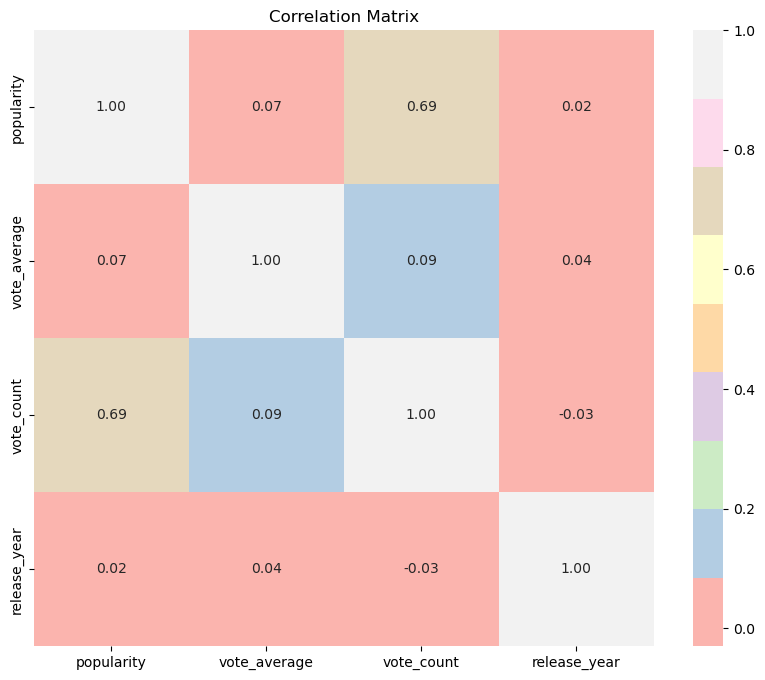

In [47]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- Positive correlation is indicated by values closer to 1.00, with brighter colors indicating stronger positive correlation.
- Negative correlation is indicated by values closer to -1.00, with darker colors indicating stronger negative correlation.The correlation matrix shows the relationship between variables : popularity, vote average, vote count, and release year.
- These correlations can help Microsoft identify factors that contribute to a movie's success at the box office. 
- By identifying variables with the strongest correlations to success metrics like popularity and vote count, Microsoft can allocate resources more effectively. 

In [48]:
# Calculate skewness
skewness_popularity = tmdb_df['popularity'].skew()
skewness_vote_average = tmdb_df['vote_average'].skew()
skewness_vote_count = tmdb_df['vote_count'].skew()
skewness_year = tmdb_df['release_year'].skew()

print("Skewness of Popularity:", skewness_popularity)
print("Skewness of Vote Average:", skewness_vote_average)
print("Skewness of Vote Count:", skewness_vote_count)
print("Skewness of Release year:", skewness_year)

Skewness of Popularity: 3.6766297670140466
Skewness of Vote Average: -0.28708730198044935
Skewness of Vote Count: 9.282429698878602
Skewness of Release year: -6.586433087279839


1. **Skewness of Popularity**:
   - A positive skewness value implies that the distribution of popularity values is skewed to the right.
   - It therefore suggests that there are more movies with lower popularity scores, and fewer movies with very high popularity scores.
   - Microsoft can use this insight to understand the distribution of audience interest in movies. 
2. **Skewness of Vote Average**:
   - A negative skewness value implies that the distribution of vote average values is skewed to the left.
   - Therefore suggesting that there are more movies with higher average ratings, and fewer movies with very low average ratings.
   - Microsoft can use this information to prioritize producing high-quality movies that appeal to audiences. They may invest in hiring talented filmmakers, scriptwriters, and actors to ensure the quality of their content.
3. **Skewness of Vote Count**:
   - A positive skewness value indicates that the distribution of vote count values is heavily skewed to the right.
   - It suggests that there are many movies with low vote counts, and very few movies with extremely high vote counts.
   - Microsoft can interpret this so as to focus on strategies to increase audience interaction and participation, such as encouraging reviews, ratings, and social media engagement.
4. **Skewness of Release Year**:
   - A negative skewness value indicates that the distribution of release year values is heavily skewed to the left.
   - Thus suggests that there are more movies released in recent years and fewer movies released in earlier years.
   - Microsoft may adapt their production strategy to align with current audience preferences and market trends, ensuring they stay relevant in the evolving landscape of the film industry.

#### Dataset : bom_df

In [49]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [50]:
# Calculate correlation
correlation_matrix = bom_df[['domestic_gross', 'foreign_gross','year']].corr()


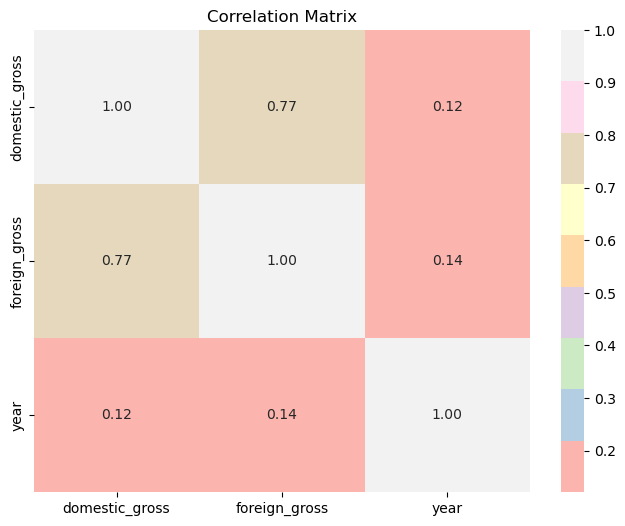

In [51]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- The correlation matrix helps to identify relationships between different financial metrics. In this case, the correlation between 'domestic_gross', 'foreign_gross', and 'year' is calculated.
- Understanding the correlations can provide insights into how the domestic and foreign gross revenues of movies are related to each other and how they are influenced by the release year.
- By analyzing the correlation between domestic and foreign gross revenues, Microsoft can gain insights into the performance of movies in different markets. A strong positive correlation would indicate that successful movies in one market tend to perform well in others as well. This insight can help Microsoft strategize its international distribution and marketing efforts more effectively.

In [52]:
# Calculate skewness
skewness_domestic_gross = bom_df['domestic_gross'].skew()
skewness_foreign_gross = bom_df['foreign_gross'].skew()
skewness_year = bom_df['foreign_gross'].skew()

print("Skewness of Domestic Gross:", skewness_domestic_gross)
print("Skewness of Foreign Gross:", skewness_foreign_gross)
print("Skewness of Year:", skewness_year)

Skewness of Domestic Gross: 3.710425424681816
Skewness of Foreign Gross: 3.070802605354412
Skewness of Year: 3.070802605354412


- Skewness measures the asymmetry of the distribution of data. A positive skewness value indicates a right-skewed distribution, while a negative value indicates a left-skewed distribution.
- For 'domestic_gross' and 'foreign_gross', the positive skewness values suggest that the distributions of both metrics are right-skewed.
- This implies that there are more movies with lower domestic and foreign gross revenues, with fewer movies achieving very high revenue figures.
- Skewness analysis of domestic and foreign gross revenues helps Microsoft understand the distribution patterns of revenue. A right-skewed distribution suggests that while there are a few blockbuster movies generating high revenue, the majority of movies earn lower revenue. This understanding can guide Microsoft in budget allocation for movie production, marketing, and distribution, ensuring they allocate resources effectively to maximize returns.

#### Dataset : im_df

In [53]:
im_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [54]:
# Correlation Analysis
correlation_matrix = im_df[['averagerating', 'numvotes', 'runtime_minutes']].corr()

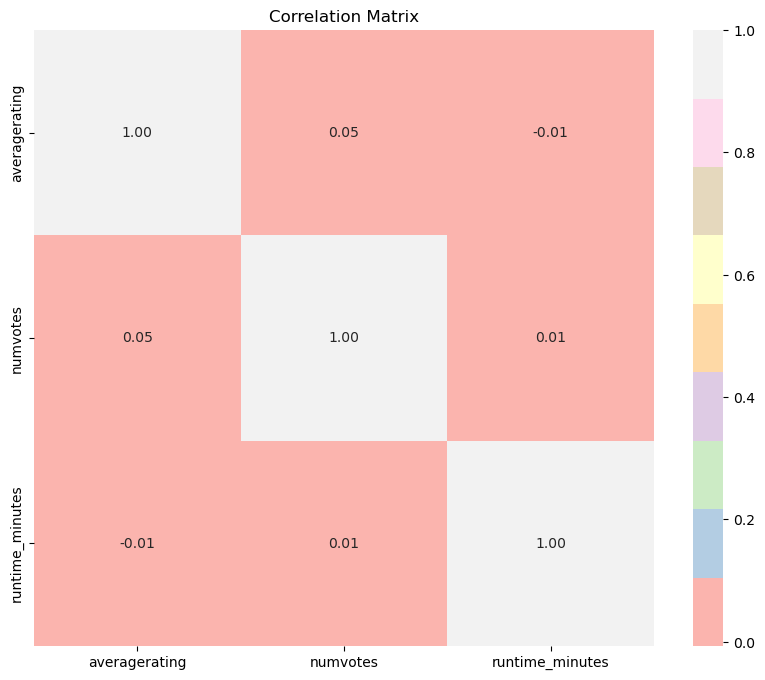

In [55]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- By calculating the correlation matrix between average rating, number of votes, and runtime, Microsoft can identify any relationships or dependencies between these variables.
- Understanding the correlations can help Microsoft prioritize factors that contribute to a movie's success at the box office. For example, if there is a strong positive correlation between average rating and number of votes, it suggests that well-rated movies tend to attract more votes, indicating audience engagement and potential box office success.

In [56]:
# Skewness Analysis
skewness_rating = im_df['averagerating'].skew()
skewness_votes = im_df['numvotes'].skew()
skewness_runtime = im_df['runtime_minutes'].skew()

print("Skewness of Average Rating:", skewness_rating)
print("Skewness of Number of Votes:", skewness_votes)
print("Skewness of Runtime (minutes):", skewness_runtime)

Skewness of Average Rating: -0.5475664571543681
Skewness of Number of Votes: 18.51224467415992
Skewness of Runtime (minutes): 229.00850233264688


- Skewness analysis helps Microsoft understand the distributional properties of key variables such as average rating, number of votes, and runtime.
- A skewness value close to zero indicates a symmetric distribution, while positive or negative skewness values indicate right or left skewness, respectively.
- For instance, the skewness of average rating being close to zero suggests a relatively symmetric distribution of movie ratings, which is desirable for creating universally appealing content.
- However, a high skewness value for the number of votes or runtime may indicate a heavily skewed distribution, highlighting potential outliers or extreme values that need further investigation.